# **Sleep** **Disorder** **Prediction**

This project aims to develop a machine learning model that predicts sleep disorders based on symptoms reported by individuals. Sleep disorders, such as insomnia, sleep apnea significantly impact an individual's health and quality of life.

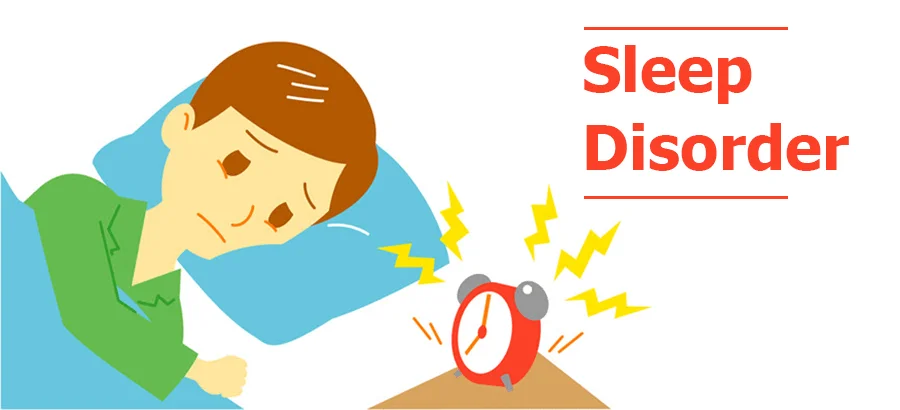

# Importing Essential libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df=pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.shape

(374, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Person ID,374.0,NaN,NaN,NaN,187.5,108.108742,1.0,94.25,187.5,280.75,374.0
Gender,374,2,Male,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,374.0,NaN,NaN,NaN,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Occupation,374,11,Nurse,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep Duration,374.0,NaN,NaN,NaN,7.132086,0.795657,5.8,6.4,7.2,7.8,8.5
Quality of Sleep,374.0,NaN,NaN,NaN,7.312834,1.196956,4.0,6.0,7.0,8.0,9.0
Physical Activity Level,374.0,NaN,NaN,NaN,59.171123,20.830804,30.0,45.0,60.0,75.0,90.0
Stress Level,374.0,NaN,NaN,NaN,5.385027,1.774526,3.0,4.0,5.0,7.0,8.0
BMI Category,374,4,Normal,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Pressure,374,25,130/85,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# To check any null values present in dataset

In [ ]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

# To find out duplicate rows in dataset

In [ ]:
df[df.duplicated()]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


In [ ]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

<Axes: xlabel='Sleep Disorder', ylabel='count'>

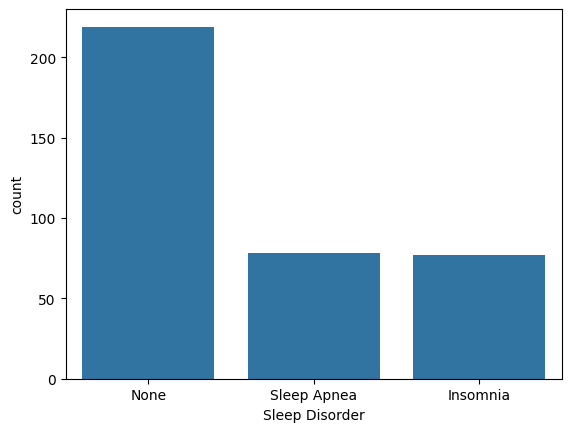

In [ ]:
sb.countplot(data=df,x='Sleep Disorder')

<Axes: xlabel='Gender', ylabel='count'>

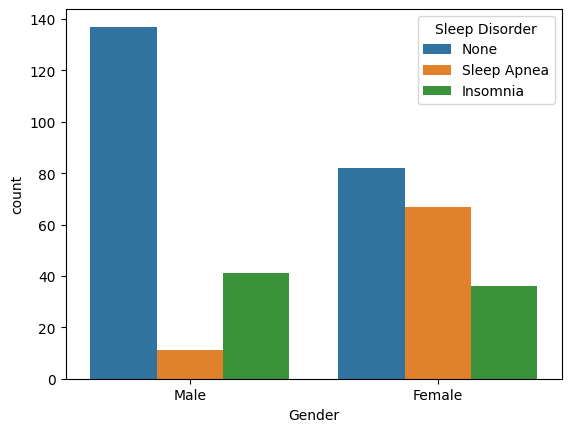

In [ ]:
sb.countplot(data=df,x='Gender',hue='Sleep Disorder')

# Box Plot for all Numerical Columns to check ouliers

In [ ]:
Num_var=[]
for i in df.columns:
 if df[i].dtype=='int' or df[i].dtype=='float':
  Num_var.append(i)

column Person ID


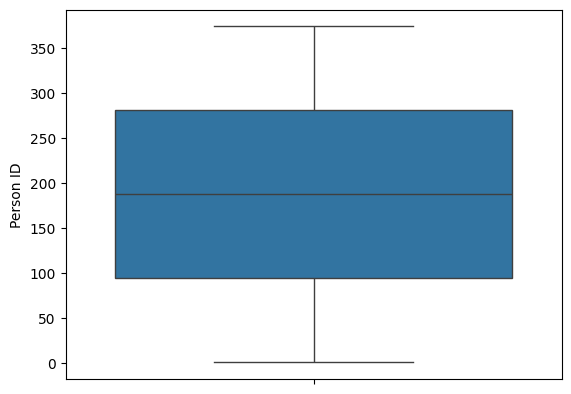


column Age


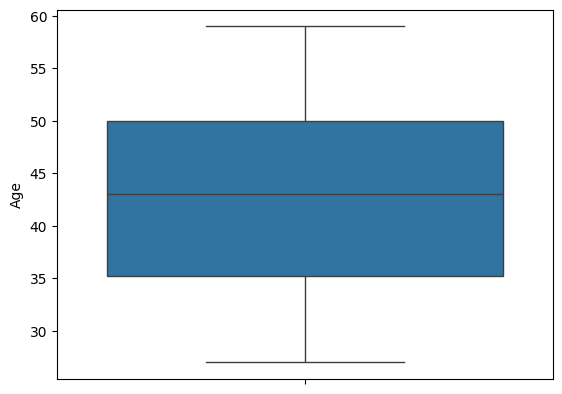


column Sleep Duration


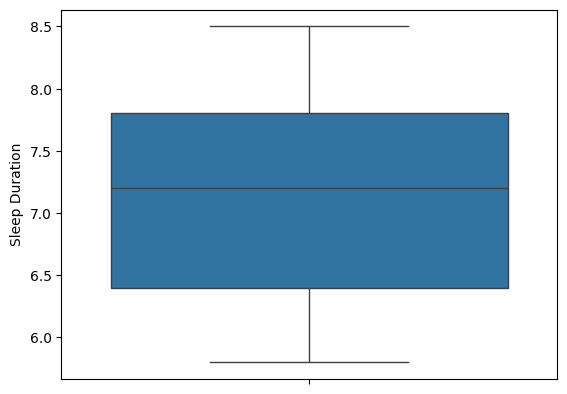


column Quality of Sleep


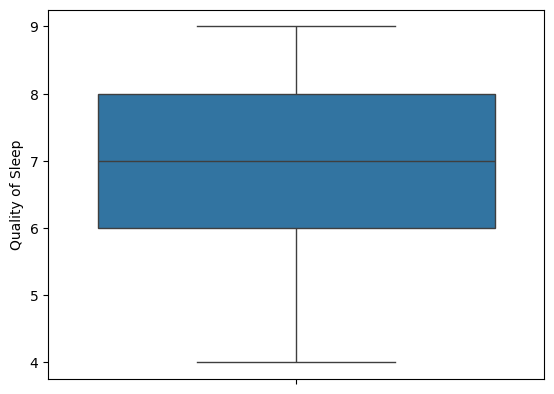


column Physical Activity Level


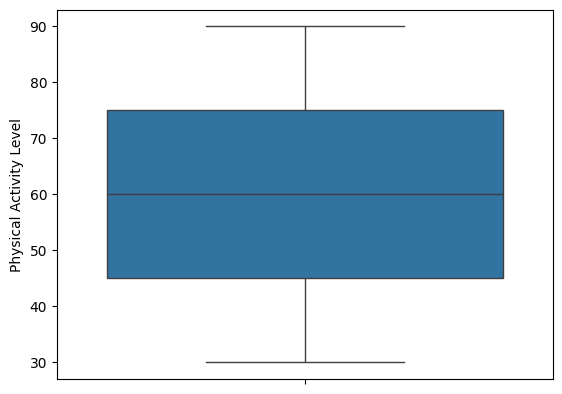


column Stress Level


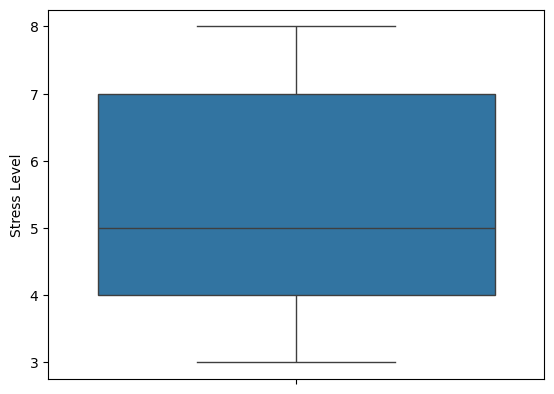


column Heart Rate


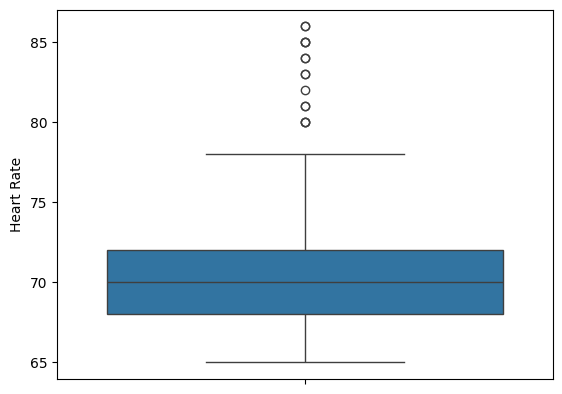


column Daily Steps


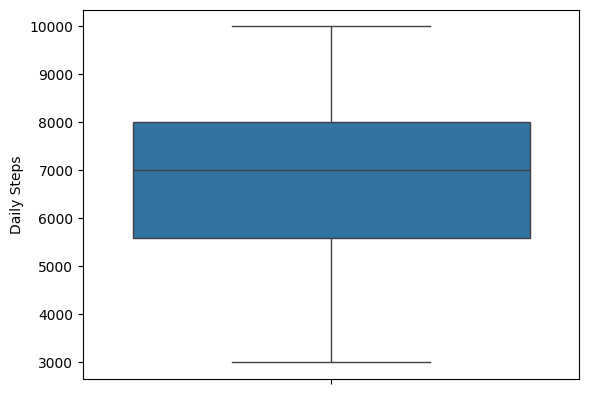

In [ ]:
 for j in Num_var:
  print('column',j)
  sb.boxplot(df[j])
  plt.show()
  print('')

# Distribution of all numerical columns to check how data is distibuted

In [ ]:
num_var=[]
for i in df.columns:
  if df[i].dtype=='int' or df[i].dtype=='float':
    num_var.append(i)

column Person ID


<ipython-input-17-b253a330300e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


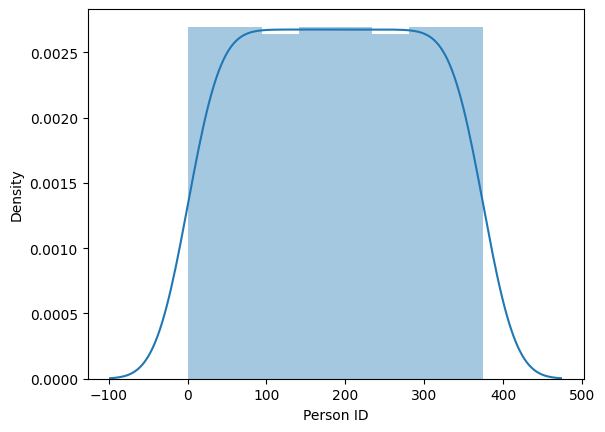


column Age


<ipython-input-17-b253a330300e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


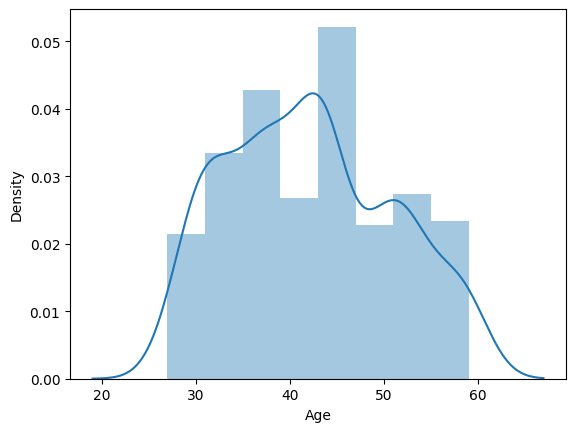


column Sleep Duration


<ipython-input-17-b253a330300e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


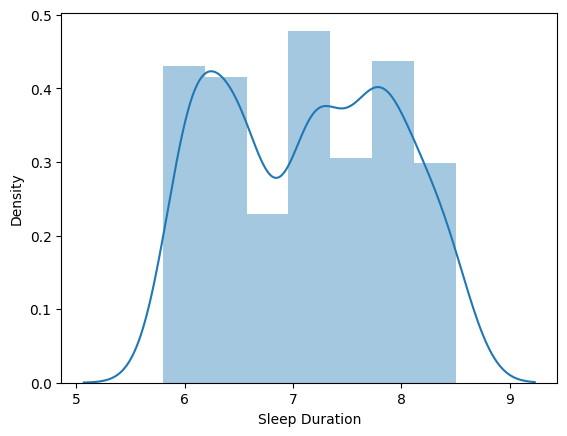


column Quality of Sleep


<ipython-input-17-b253a330300e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


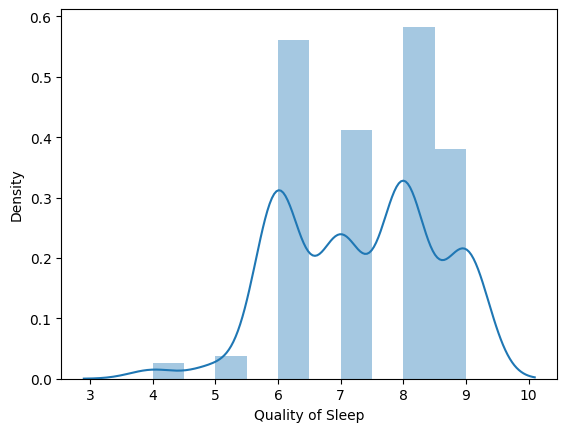


column Physical Activity Level


<ipython-input-17-b253a330300e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


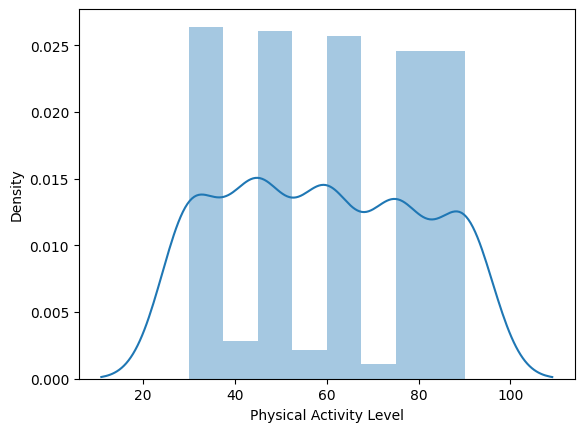


column Stress Level


<ipython-input-17-b253a330300e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


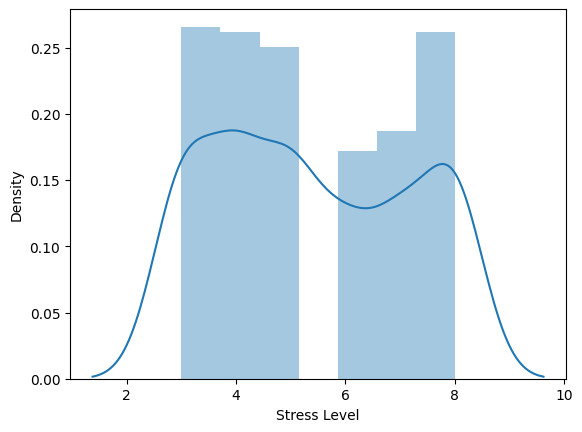


column Heart Rate


<ipython-input-17-b253a330300e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


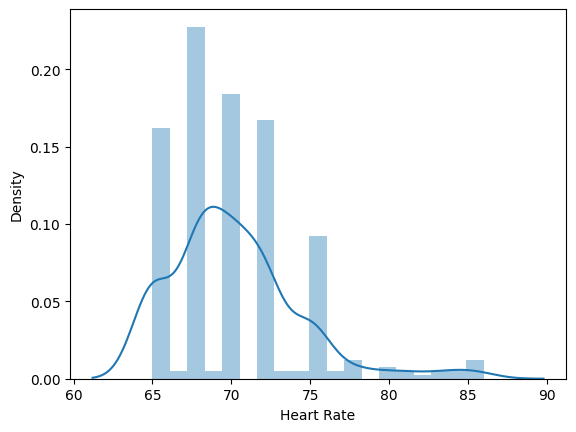


column Daily Steps


<ipython-input-17-b253a330300e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


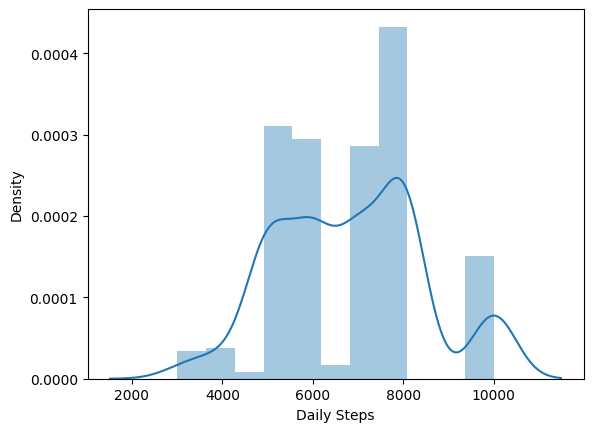

In [ ]:
for j in num_var:
 print('column',j)
 sb.distplot(df[j])
 plt.show()
 print('')


In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
df_cols=df.columns

In [ ]:
Categorical = [var for var in df_cols if df[var].dtype=='O']
print('There are {} categorical columns\n'.format(len(Categorical)))

There are 5 categorical columns



In [ ]:
Numerical = [var for var in df_cols if df[var].dtype!='O']
print('There are {} numerical columns\n'.format(len(Numerical)))

There are 8 numerical columns



# label encoding
Label encoding is a process of converting categorical labels into numerical values, assigning a unique integer to each category. It's commonly used in machine learning to prepare categorical data for algorithms that require numerical input

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df[Categorical]=df[Categorical].apply(le.fit_transform)

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,11,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,9,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,9,75,10000,1
3,4,1,28,6,5.9,4,30,8,2,22,85,3000,2
4,5,1,28,6,5.9,4,30,8,2,22,85,3000,2


In [ ]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,0,59,5,8.1,9,75,3,3,23,68,7000,2
370,371,0,59,5,8.0,9,75,3,3,23,68,7000,2
371,372,0,59,5,8.1,9,75,3,3,23,68,7000,2
372,373,0,59,5,8.1,9,75,3,3,23,68,7000,2
373,374,0,59,5,8.1,9,75,3,3,23,68,7000,2


# Heatmap Correalation Matrix

A heatmap correlation matrix visually represents the strength and direction of relationships between variables in a dataset, with colors indicating the degree of correlation. It helps quickly identify patterns and dependencies among variables, aiding in understanding their interplay.

In [ ]:
corr=df.corr()

<Axes: >

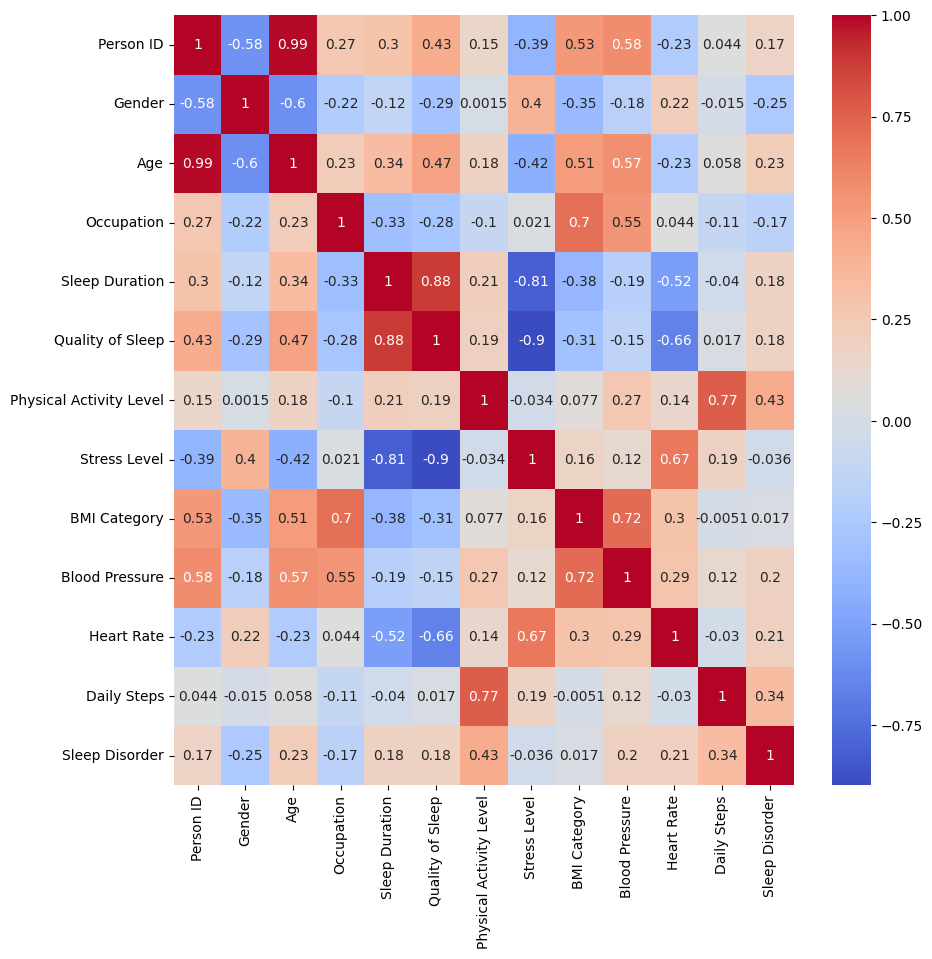

In [ ]:
plt.figure(figsize=(10,10))
sb.heatmap(corr,annot=True,cmap='coolwarm')

# Splitting dataset for train and test

In [ ]:

x= df.drop('Sleep Disorder',axis=1)
y=df['Sleep Disorder']

In [ ]:
x

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,1,27,9,6.1,6,42,6,3,11,77,4200
1,2,1,28,1,6.2,6,60,8,0,9,75,10000
2,3,1,28,1,6.2,6,60,8,0,9,75,10000
3,4,1,28,6,5.9,4,30,8,2,22,85,3000
4,5,1,28,6,5.9,4,30,8,2,22,85,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,3,23,68,7000
370,371,0,59,5,8.0,9,75,3,3,23,68,7000
371,372,0,59,5,8.1,9,75,3,3,23,68,7000
372,373,0,59,5,8.1,9,75,3,3,23,68,7000


In [ ]:
y

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape

((299, 12), (75, 12))

# Standard Scaling
Standard scaling is a method used to transform data so that it has a mean of 0 and a standard deviation of 1, making it easier to compare different features that may have different scales

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
x_train_scl=ss.fit_transform(x_train)
x_test_scl=ss.transform(x_test)

In [ ]:
x_train_scl

array([[ 0.0132283 ,  1.04446594,  0.05581074, ...,  0.2631234 ,
         0.48108094, -0.55464259],
       [-1.08337261,  1.04446594, -1.11114118, ..., -0.5679389 ,
         0.48108094, -1.18044687],
       [-0.99901869,  1.04446594, -0.87775079, ..., -0.98347004,
        -0.01407638,  0.69696597],
       ...,
       [ 0.74429557, -0.95742711,  0.7559819 , ...,  1.37120647,
         1.22381692,  1.94857454],
       [ 1.47536284, -0.95742711,  1.68954343, ...,  1.37120647,
        -0.5092337 ,  0.07116169],
       [-0.83031086, -0.95742711, -0.7610556 , ..., -1.81453234,
        -0.5092337 ,  0.07116169]])

In [ ]:
x_train=pd.DataFrame(x_train_scl,columns=x_train.columns)
x_test=pd.DataFrame(x_test_scl,columns=x_test.columns)

In [ ]:
x_train

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,0.013228,1.044466,0.055811,1.052791,-0.833457,-1.155098,-0.728644,0.956601,1.183173,0.263123,0.481081,-0.554643
1,-1.083373,1.044466,-1.111141,-0.900371,-1.468533,-1.155098,-1.450369,1.522984,-0.914270,-0.567939,0.481081,-1.180447
2,-0.999019,1.044466,-0.877751,1.703845,0.436694,0.537913,-0.006920,-0.176166,-0.215122,-0.983470,-0.014076,0.696966
3,1.606580,-0.957427,1.922934,0.401737,1.325801,1.384419,0.714805,-1.308933,1.183173,1.371206,-0.509234,0.071162
4,-1.636359,-0.957427,-1.577922,0.401737,-0.833457,-2.001604,-0.969219,0.956601,-0.215122,0.678655,2.461710,-1.806251
...,...,...,...,...,...,...,...,...,...,...,...,...
294,-1.120863,1.044466,-1.111141,-0.900371,-1.341518,-1.155098,-1.450369,1.522984,-0.914270,-0.567939,0.481081,-1.180447
295,-0.792820,-0.957427,-0.644360,0.401737,-1.341518,-1.155098,-0.872989,0.390217,1.183173,-0.290918,1.718974,-1.681090
296,0.744296,-0.957427,0.755982,0.401737,-1.341518,-1.155098,1.436530,1.522984,1.183173,1.371206,1.223817,1.948575
297,1.475363,-0.957427,1.689543,0.401737,1.325801,1.384419,0.714805,-1.308933,1.183173,1.371206,-0.509234,0.071162


# Balancing of target variable

Balancing the target variable involves ensuring that each class or category within it has roughly the same number of observations, which helps prevent biases toward overrepresented classes in machine learning models and ensures fair predictions across all classes

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smt=SMOTETomek()

In [ ]:
x_train,y_train=smt.fit_resample(x_train,y_train)

In [ ]:
y_train.value_counts()

0    174
1    174
2    172
Name: Sleep Disorder, dtype: int64

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression(C= 10, penalty= 'l1', solver='saga')

In [ ]:
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, penalty='l1', solver='saga')

In [ ]:
test=logreg.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix

In [ ]:
Accuracy=accuracy_score(test,y_test)*100
print('Testing Accuracy',Accuracy)

Testing Accuracy 90.66666666666666


In [ ]:
clf_report=classification_report(test,y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.98      0.95      0.97        44
           2       0.75      0.92      0.83        13

    accuracy                           0.91        75
   macro avg       0.87      0.89      0.87        75
weighted avg       0.91      0.91      0.91        75



In [ ]:
def CM(Act,Pred):
  cm = confusion_matrix(Act,Pred)
  sb.heatmap(cm,annot = True,fmt = '.2f',xticklabels=['None','Sleep Apnea','Insomnia']
             ,yticklabels=['None','Sleep Apnea','Insomnia'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title("Confusion Matrix")
  plt.show()

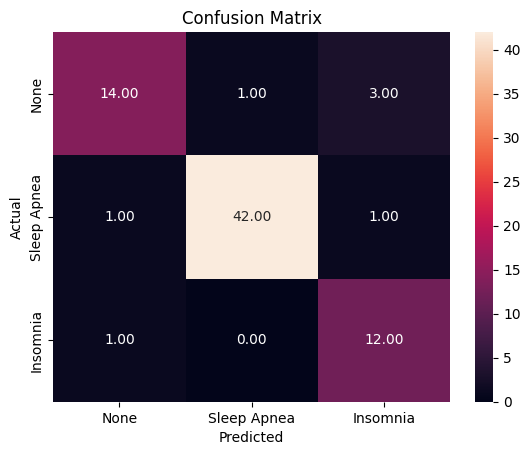

In [ ]:
CM(test,y_test)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Dt=DecisionTreeClassifier()

In [ ]:
Dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_Dt=Dt.predict(x_test)


In [ ]:
Accuracy=accuracy_score(y_pred_Dt,y_test)*100
print('Testing Accuracy',Accuracy)

Testing Accuracy 92.0


In [ ]:
clf_report=classification_report(y_pred_Dt,y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       1.00      0.93      0.97        46
           2       0.75      1.00      0.86        12

    accuracy                           0.92        75
   macro avg       0.88      0.92      0.89        75
weighted avg       0.93      0.92      0.92        75



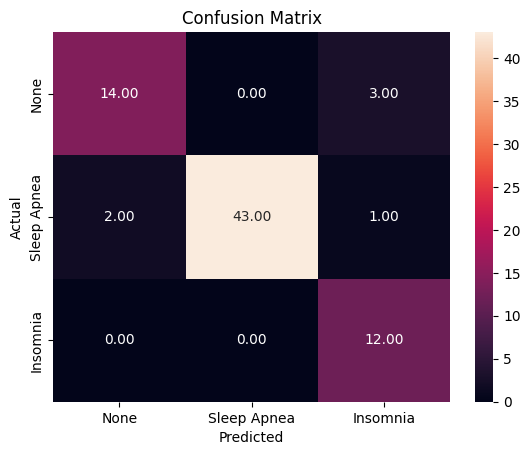

In [ ]:
CM(y_pred_Dt,y_test)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(max_depth= None, min_samples_split= 2, n_estimators= 100,random_state=80)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=80)

In [ ]:
y_pred_rfc=rfc.predict(x_test)

In [ ]:
Accuracy=accuracy_score(y_pred_rfc,y_test)
print('Testing Accuracy',Accuracy)

Testing Accuracy 0.88


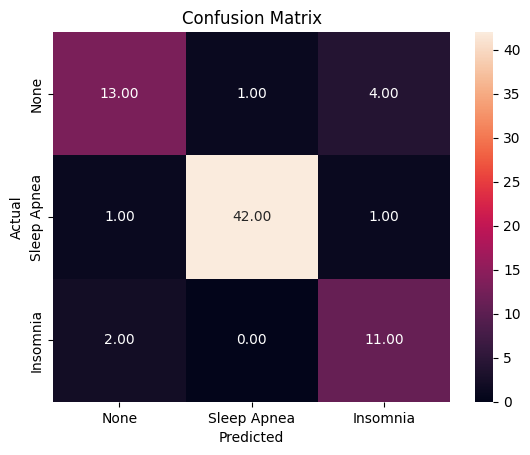

In [ ]:
CM(y_pred_rfc,y_test)

# Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
clf=svm.SVC(C= 1, gamma='scale',kernel='linear')

In [ ]:
clf.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [ ]:
y_pred_svm=clf.predict(x_test)

In [ ]:
Accuracy=accuracy_score(y_pred_svm,y_test)*100
print('Testing Accuracy',Accuracy)

Testing Accuracy 92.0


# Gradient Boosting
Gradient boosting is a machine learning technique that builds a strong predictive model by combining the predictions of many weak models, typically decision trees, in a sequential manner. It works by fitting each new model to the errors made by the previous ones, gradually reducing the prediction errors and improving overall accuracy.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc=gbc.predict(x_test)

In [ ]:
Accuracy=accuracy_score(y_pred_gbc,y_test)*100
print('Testing Accuracy',Accuracy)

Testing Accuracy 90.66666666666666


# XG Boosting

XGBoost is a powerful machine learning algorithm that boosts decision trees sequentially, combining their predictions to enhance accuracy. It's known for its efficiency, scalability, and ability to handle diverse data types

In [ ]:
from xgboost import XGBClassifier

In [ ]:

xgb = XGBClassifier(n_estimators = 200,max_depth = 3)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb=xgb.predict(x_test)

In [ ]:
Accuracy=accuracy_score(y_pred_xgb,y_test)*100
print('Accuracy Score',Accuracy)

Accuracy Score 90.66666666666666


# Grid Search CV for Logistic
Grid search CV is a method used to find the best combination of hyperparameters for a machine learning model by exhaustively searching through a specified grid of parameter values and evaluating each combination using cross-validation. It systematically tests different parameter values to determine the optimal configuration, enhancing the model's performance

In [ ]:
import warnings
from sklearn.model_selection import GridSearchCV

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

In [ ]:
grid_search= GridSearchCV(logreg,param_grid,cv=5)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=10, penalty='l1', solver='saga'),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [ ]:
grid_search.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
grid_search.best_score_

0.925

# GridSearchCV for Random forest

In [ ]:
grid_space={'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
}

In [ ]:
grid_search= GridSearchCV(rfc,grid_space,cv=5)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=80),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
grid_search.best_score_

0.946153846153846

# GridSearchCV for SVM

In [ ]:
param_grid1 = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [ ]:
svm_clf=svm.SVC()

In [ ]:
grid_Search= GridSearchCV(svm_clf,param_grid1,cv=5)

In [ ]:
grid_Search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [ ]:
grid_Search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
grid_Search.best_score_

0.9346153846153845